## 🛑 Complete los siguientes datos 

- Nombre y Apellidos: Haizea Rodriguez Cores
- Entrega: 04 Time Series
- Fecha: 28/11/2021
- Tiempo dedicado a la entrega: 8h
- Principales dudas y dificultades encontrados en el desarrollo:

> Comprensión de enunciado, no me quedo muy claro cual era el final de la práctica, si una vez obtenido los porcentajes teníamos que parar o había que hacer algo más. 

> Trabajar con todas las empresas, al ser tantas, complicaba la ejecución de la práctica.

> Decidir el número óptimo de clusters para ver el resultado solo tenía la gráfica hasta que encontré otra froma de visualizarlo en intener pero esto me llevó bastante tiempo. 

#Instrucciones Generales

**Laboratorio de IA**

**Contexto de la práctica, preliminares e instrucciones**

Este es el cuaderno que utilizarás como **plantilla** para entrega de la asignatura Laboratorio de IA del tema correpondiente.

La práctica está **alineada** con las sesiones de teoría y el ejemplo de código visto en el aula, por lo que es recomendable un repaso al material del tema previo a la implementación de la práctica. 

Por favor, **lee atentamente** el enunciado. Si tienes alguna duda, utiliza el foro o ponte en contacto con el profesor (pero no compartas código). 

Consideraciones generales sobre el código:
- Cuando se le pida que presente un valor o resultado, muéstrelo con el contexto y la precisión adecuados, es decir, "La tabla tiene 100 filas y 4 columnas" en lugar de mostrar "100 4" por pantalla o "precisión del 66,7%" en lugar de simplemente imprimir "0,66666666".
- Utilice tantas celdas (de texto o de código) como considere para dar una respuesta legible y clara a las preguntas planteadas.
- Mostrar resultados intermedios o finales (tablas, contenido de las variables...) que demuestren que la solución es correcta si fuera necesario.
- No olvide importar todas las librerías necesarias para la correcta ejecución del código, incluyendo la instalación de las mismas, si fuera necesario. 


**Para entregar el cuaderno:**
- Imprímelo en un archivo PDF con todas las secciones expandidas y todas las celdas ejecutadas, de forma que se pueda ver todo el código y se muestren todos los resultados.
- Guardar el cuaderno como archivo ipynb.

Envía ambos archivos en una carpeta zip a ALUD. Nombre los ficheros con su nombre, apellidos y el número de práctica.

**Evaluación:**  Esta práctica cuenta un 12.5% de la evaluación final de la asignatura.

En las indicaciones, hay instrucciones extra indicadas con el símbolo 🤖. No son requisitos para superar la práctica, sino acciones que puedes realizar para mejorar la calificación.

La calificación de los ejercicios se hará con los siguientes criterios:
- [9 a 10] puntos: La solución aportada cumple con los requisitos de forma excelente y existen aspectos positivos o extras (🤖) que avalan su excelencia.
- [7 a 9] puntos: La solución aportada cumple con los requisitos, pero algunas cuestiones menores son susceptibles de ser mejoradas, tales como: presentación de la solución, justificación de la decisión tomada, eficiencia del código...
- [5 a 7] puntos: Las soluciones aportadas no cumplen alguno de los requisitos, como por ejemplo: no se responde a una pregunta, no se aporta la solución a una parte...
- [1 a 5] puntos: La solución aportada no cumple con varios requisitos.
- [0] puntos: solución no aportada o solución plagiada.

La limpieza y la eficiencia del código, así como las explicaciones dadas serán tenidas en cuenta  para la evaluación.

**Plazo:** El plazo de entrega de la práctica son dos semanas tras la presentación de la misma en el aula.

Tenga presente que la práctica puede entregarse pasado el plazo dado, en cualquier momento del cuatrimestre, teniendo en cuenta que, la entrega pasado el plazo será evaluada sobre el 75% de la calificación.


# 🛑 Desarrollo a realizar

En las próximas celdas, tendrá que desarrollar un sistema para agrupar series temporales: [Dataset](https://drive.google.com/open?id=1QMLN5CaY9kKfyKt_rakQPP_fhxDYguO3)). El alumno determinará el número de grupos en base al criterio fundamentado que decida .

**Requisitos básicos**
 - Realizar un preprocesado de datos adecuado
  - Se creará un nuevo conjunto de datos que será el resultado de aplicar una ventana deslizante sobre las series temporales existentes (por cada empresa). 
  - El tamaño de la ventana deslizante será parametrizable 
 - Utilizar al menos un método de agrupamiento 
 - Construir un modelo que se base en el porcentaje de grupos a los que pertenece cada una de sus ("subseries" temporales). 
  - El modelo tendrá tantas dimensiones como grupos se hayan definido el algoritmo de clustering
  - Cada subserie (ventana) caerá dentro de un grupo
  - Se calculará el porcentaje de subseries que han caído en cada grupo
  - Esos porcentajes serán el vector que representa a la serie temporal
  
**Consideraciones deseables**
 - Incluir alguna métrica adicional para la evaluación de los modelos, Elbow Method o Silhouette Score

**🤖Requisitos extra**
 - Entrenar un Variational AutoEncoder que sea capaz de reducir la dimensionalidad de las series temporales. 
 - Aplicar un algoritmo de clustering (ej. KMeans) sobre los vectores de la capa latente
 - Comparar los resultados obtenidos con respecto al clustering realizado con tslearn.


## Importar librerías

In [ ]:
!pip install tslearn

     |████████████████████████████████| 793 kB 5.2 MB/s 


In [ ]:
import numpy as np
np.random.seed(4)
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import plotly as py
import plotly.io as pio
import plotly.express as px
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers import LSTM, Dense, SimpleRNN, Dropout
import keras 
import tslearn.clustering
import sklearn
from tslearn.generators import random_walks
from yellowbrick.cluster import KElbowVisualizer

%matplotlib inline 
from sklearn.cluster import KMeans

import warnings

warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)
pio.renderers.default='browser'

## Carga del dataset

Cargar los datos con toda la información de las empresas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data/all_stocks_5yr.csv',  parse_dates =["date"], index_col ="date")
df.head()

,open,high,low,close,volume,Name
date,,,,,,
2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [ ]:
#otra forma de leer subiendo los datos al collab
'''
df = pd.read_csv('all_stocks_5yr.csv',  parse_dates =["date"], index_col ="date")
df.head()
'''

'\ndf = pd.read_csv(\'all_stocks_5yr.csv\',  parse_dates =["date"], index_col ="date")\ndf.head()\n'

## Procesado

Separar o quedarnos con la parte de los nombre en un array para más tarde crear los diccionarios y poder iterar con ella 

In [ ]:
df['Name'].value_counts()
# tenemos 505 empresas diferentes y cada una tiene un número distinto de entradas 

ILMN    1259
ANTM    1259
GWW     1259
AET     1259
WM      1259
        ... 
DXC      215
BHGE     152
BHF      143
DWDP     109
APTV      44
Name: Name, Length: 505, dtype: int64

In [ ]:
#guardar en una lista el nombre de cada una de las empresas
lista_empresas = df['Name'].unique()
listado_df = []

# Recorre la lista de empresas, el valor de x es cada una de las empresas
for x in range(len(lista_empresas)): 
  #valor = str(lista_empresas[x]) + str('_df')
  empresa = df.loc[df['Name'] == lista_empresas[x]]
  
  #eliminamos las columnas que no necesitamos 
  empresa = empresa.drop(['open', 'high','low', 'volume', 'Name'], axis = 1)
  listado_df.append(empresa)


In [ ]:
# creación del diccionario 
zip_iterator = zip(lista_empresas, listado_df)
a_dictionary = dict(zip_iterator)

## Método del codo 

Cuando trabajamos con clusters uno de los problemas principales es decidir el número de clusters que se van a aplicar.
Para evaluar esto tenemos un método denominaod método del codo (Elbow method) que consiste en evaluar la suma de las distancias al cuadado de cada objeto del Cluster a su centroide:

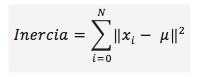

Una vez se evalua esto para distintos valores (de 1 a N) se representa en una gráfica que tiene forma de codo, de ahi su nombre. Se van mostrando la situación de cada uno de las opciones aquella que se encuentre en el extremo inferior tras un cambio brusco (el codo) será el número óptimo de clusters.

In [ ]:
from scipy.spatial.distance import cdist

In [ ]:
distortions = []
K = range(1, 10)
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(a_dictionary[lista_empresas[1]])
 
    distortions.append(sum(np.min(cdist(a_dictionary[lista_empresas[0]], kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / a_dictionary[lista_empresas[0]].shape[0])
    

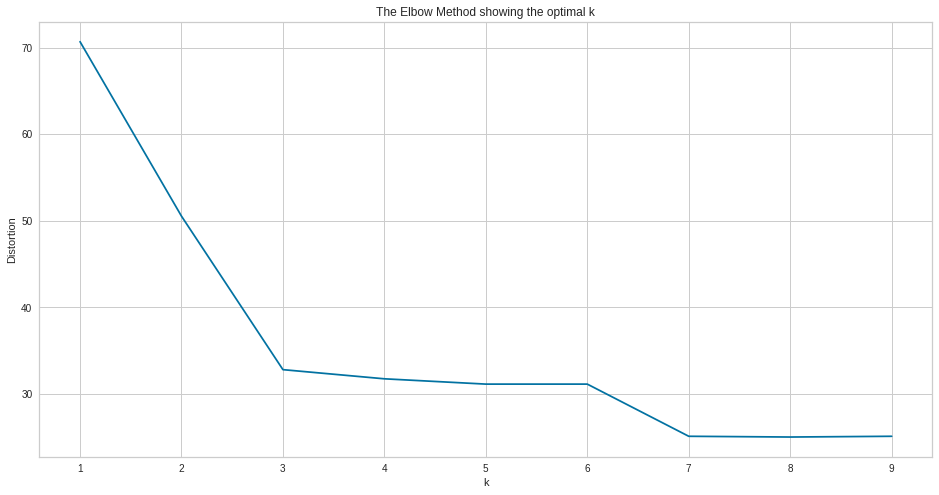

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

3


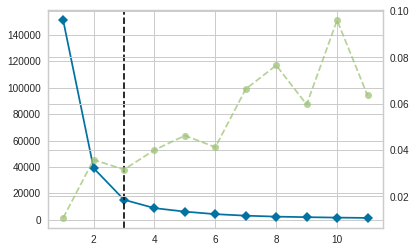

In [ ]:
# visualizar lo que ocurre con una de las empresas
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(a_dictionary[lista_empresas[0]])# Entrenamos con los datos
valor = visualizer.elbow_value_
print(valor)
#visualizer.show()# Renderizamos la imagen

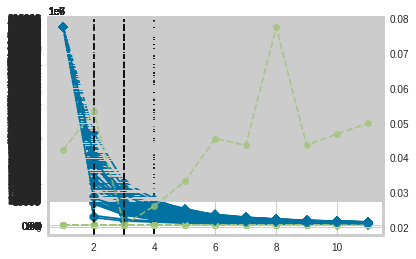

In [ ]:
# repetimos el mismo proceso guardando en una variable el mejor resultado del elbow
# la iamgen resultante no nos interesa peor si el valor que se guarda dentro de resultado 

resultado = []
for x in range(len(lista_empresas)): 
  kmeanModel = KMeans()
  visualizer = KElbowVisualizer(kmeanModel, k=(1,12))
  visualizer.fit(a_dictionary[lista_empresas[x]])
  resultado.append(visualizer.elbow_value_)


In [ ]:
# la media de número de cluster optimo para las 505 empresas
numero_clusters = round(np.mean(resultado),0)

In [ ]:
numero_clusters

3.0

## Shilouette

El gráfico de silueta muestra que el coeficiente de silueta más alto es el número óptimo de grupos.

In [ ]:
from sklearn.metrics import silhouette_score
# esta para una única empresa se puede replicar para todas ellas 
sil = []
kmax = 10
x = a_dictionary[lista_empresas[0]]
K_val = range(2, kmax+1)
# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in K_val:
  kmeans = KMeans(n_clusters = k).fit(x)
  labels = kmeans.labels_
  sil.append(silhouette_score(x, labels, metric = 'euclidean'))
  


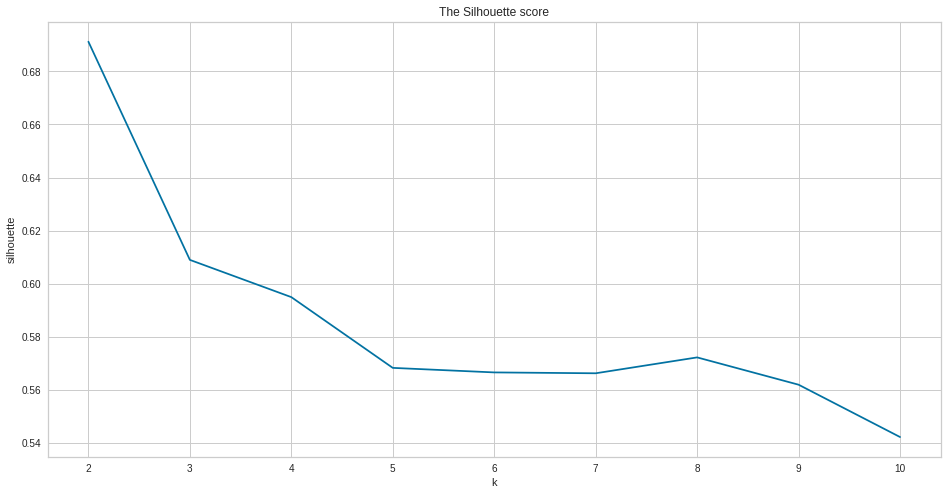

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(K_val, sil, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette')
plt.title('The Silhouette score')
plt.show()

https://dzone.com/articles/kmeans-silhouette-score-explained-with-python-exam 

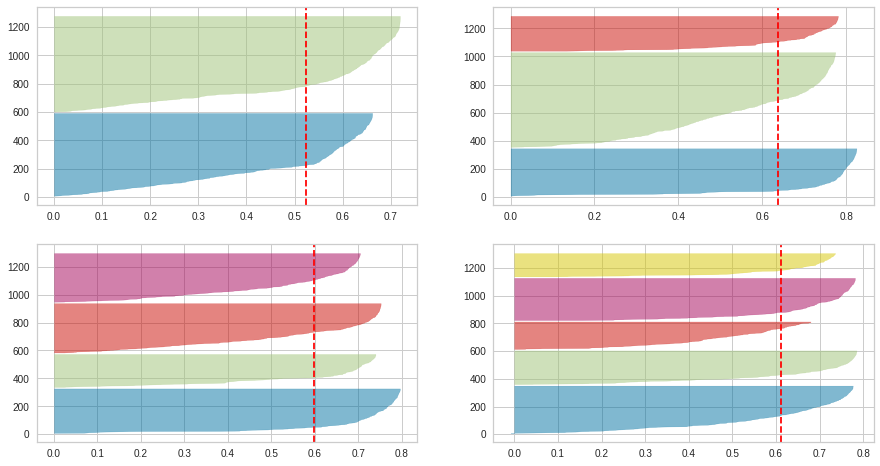

In [ ]:
# otra forma de visualizarlo 
from yellowbrick.cluster import SilhouetteVisualizer
x = a_dictionary[lista_empresas[1]]
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(x)

Tanto la distribución como la anchura de cada uno de los clusters es improtante analizar a la hora de decidir en este caso podemos ver como 2 clusters quizás es lo que mejor se ajusta a la situación. Si cambiamos de empresa esto puede variar. 

Explicar partición inteligente 

In [ ]:
''' partición de un caso, lo vamos a hacer por cada empresa, tenemos que meterlo en un bucle
print(str(df['Name']))
df = df.sort_index()
#pandas rolling
df_train = df[:'2017'].iloc[:,3:4]
df_test = df['2018':].iloc[:,3:4]

df_train['close'].plot(legend=True)
df_test['close'].plot(legend=True)
plt.legend(['Train data (2013-2017)', 'Test data (2018)'])
plt.show()
'''

" partición de un caso, lo vamos a hacer por cada empresa, tenemos que meterlo en un bucle\nprint(str(df['Name']))\ndf = df.sort_index()\n#pandas rolling\ndf_train = df[:'2017'].iloc[:,3:4]\ndf_test = df['2018':].iloc[:,3:4]\n\ndf_train['close'].plot(legend=True)\ndf_test['close'].plot(legend=True)\nplt.legend(['Train data (2013-2017)', 'Test data (2018)'])\nplt.show()\n"

## Generar conjunto de datos moviendo la ventana

window_size es la variable que indica el tamaño de ventana que vamos a utilizar para que si es parametrizable se pueda cambiar. 

In [ ]:
#@title Definir tamaño de la ventana
window_size = 5 #@param {type:"integer"}


In [ ]:
window_size = 5 # tamaño de la ventana 

In [ ]:

df_empresas_rolling = [] # se crea para más tarde volver a generar un diccionario
for x in range(len(lista_empresas)): # bucle que recorre cada una de las empresas 

  df = a_dictionary[lista_empresas[x]] 
  df_empresa_rolling = [] # se guardará el contenido resultante de hacer el rolling por cada empresa 

  for df_ventana in (df.rolling(window_shape, min_periods=1)):

    #escalar/normalizar
    #df_scaled = (df-df.min())/(df.max()-df.min())
    df_ventana = np.array(df_ventana).reshape((-1, 1)) #para que no de error hay que hacer un reshape
    sc= MinMaxScaler(feature_range=(0,1)) 
    df_scaled = sc.fit_transform(df_ventana)

    # Hago esto para no tener ventanas de tamaño 1 o 2, ya que nos dará probemas más adelante
    if(len(df_scaled) >= window_shape):
      df_empresa_rolling.append(df_scaled)
    
  ## guardar en el df de empresas el conjunto de ventanas generado por cada empresa 
  df_empresas_rolling.append(df_empresa_rolling)

In [ ]:
# volvemos a crear el diccionario esta vez guardando el resultado de rolling escalado 
zip_iterator = zip(lista_empresas, df_empresas_rolling)
a_dictionary_ventana = dict(zip_iterator)

In [ ]:
# muestra de que se están guardando correctamente
a_dictionary_ventana['AAL']

[array([[1.        ],
        [0.61842105],
        [0.36842105],
        [0.88157895],
        [0.        ]]), array([[0.70149254],
        [0.41791045],
        [1.        ],
        [0.        ],
        [0.76119403]]), array([[0.41791045],
        [1.        ],
        [0.        ],
        [0.76119403],
        [0.40298507]]), array([[1.        ],
        [0.4962406 ],
        [0.87969925],
        [0.69924812],
        [0.        ]]), array([[0.56410256],
        [1.        ],
        [0.79487179],
        [0.        ],
        [0.03418803]]), array([[1.        ],
        [0.79487179],
        [0.        ],
        [0.03418803],
        [0.20512821]]), array([[1.        ],
        [0.25      ],
        [0.28225806],
        [0.44354839],
        [0.        ]]), array([[0.56363636],
        [0.63636364],
        [1.        ],
        [0.        ],
        [0.43636364]]), array([[0.63636364],
        [1.        ],
        [0.        ],
        [0.43636364],
        [0.70909091]]), 

In [ ]:
'''
En clase la ventana se realiza de la siguiente manera: 
time_step = 5 ## REVISAR 
empresas_x = []
empresas_y = []
for x in range(len(lista_empresas)): 

  df = a_dictionary[lista_empresas[x]]
  df = df.sort_index()
  #pandas rolling
  df_train = df[:'2017'].iloc[:,3:4]
  df_test = df['2018':].iloc[:,3:4]
  #normalizar los datos
  df_train_scaled=(df_train-df_train.min())/(df_train.max()-df_train.min())

  #ventana 
  m = len(df_train_scaled)
  X_train = []
  Y_train = []

  for i in range(time_step,m):
      X_train.append(df_train_scaled.iloc[i-time_step:i,0])
      Y_train.append(df_train_scaled.iloc[i,0])

  empresas_x.append(X_train)
  empresas_y.append(Y_train)
    
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

'''

"\nEn clase la ventana se realiza de la siguiente manera: \ntime_step = 5 ## REVISAR \nempresas_x = []\nempresas_y = []\nfor x in range(len(lista_empresas)): \n\n  df = a_dictionary[lista_empresas[x]]\n  df = df.sort_index()\n  #pandas rolling\n  df_train = df[:'2017'].iloc[:,3:4]\n  df_test = df['2018':].iloc[:,3:4]\n  #normalizar los datos\n  df_train_scaled=(df_train-df_train.min())/(df_train.max()-df_train.min())\n\n  #ventana \n  m = len(df_train_scaled)\n  X_train = []\n  Y_train = []\n\n  for i in range(time_step,m):\n      X_train.append(df_train_scaled.iloc[i-time_step:i,0])\n      Y_train.append(df_train_scaled.iloc[i,0])\n\n  empresas_x.append(X_train)\n  empresas_y.append(Y_train)\n    \nX_train, Y_train = np.array(X_train), np.array(Y_train)\nX_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))\n\n"

## Agrupamiento / Clustering

In [ ]:
# ejemplo con una única empresa 
# -----------------------------
# la variable numero clusters la obtenemos arriba tras utilizar el método del codo para calcularla  
#km = tslearn.clustering.TimeSeriesKMeans(n_clusters=numero_clusters, metric="dtw", max_iter=5, max_iter_barycenter=5, random_state=0).fit(a_dictionary_ventana[lista_empresas[0]])
km = tslearn.clustering.TimeSeriesKMeans(n_clusters=int(numero_clusters), metric="dtw", max_iter=5, max_iter_barycenter=5, random_state=0).fit(a_dictionary_ventana[lista_empresas[0]])

array_valores = []
for n in range(num_clusters): 
  valores = 0
  for x in range(len(km.labels_)): 
    if (km.labels_[x] == n): 
      valores += 1
  array_valores.append(valores) 

In [ ]:
array_valores # dónde x,y,z indican la cantidad de ventanas que hay dentro de cada grupo 

[246, 540, 469]

### Para todas las empresas
-----------------------------

Hay dos fromas de hacer esto, usando numero_clusters que está definido en la parte superior y se obtiene con la media del método del codo para cada empresa o usando resultado[x] dónde la x es cada una de las empresas y calculando el resultado para el número óptimo de clusters en cada caso, algunas 2 otras 3. 




In [ ]:
cluster_empresas = [] # cantidad de resultados dentro de cada cluster
cluster_empresas_porcentaje = [] # porcentaje 
for x in range(len(lista_empresas)): 
  km = tslearn.clustering.TimeSeriesKMeans(n_clusters=int(resultado[x]), metric="euclidean", max_iter=5, random_state=0).fit(a_dictionary_ventana[lista_empresas[x]])
  # otra forma de calcular los clusters 
  #km = tslearn.clustering.TimeSeriesKMeans(n_clusters=2, metric="dtw", max_iter=5, max_iter_barycenter=5, random_state=0).fit(a_dictionary_ventana[lista_empresas[x]])

  # a partir de este punto se generan dos arrays que contienen la cantidad de empresas que caen en cada grupo de cluster 
  array_valores = []
  array_porcentaje = [] # se guarda porcentaje de cada grupo 
  total = len(a_dictionary_ventana[lista_empresas[x]])
  for n in range(resultado[x]): 
    valores = 0
    for x in range(len(km.labels_)): 
      if (km.labels_[x] == n): 
        valores += 1
    array_valores.append(valores) 
    array_porcentaje.append(round((valores / total),3))
  
  cluster_empresas.append(array_valores)
  cluster_empresas_porcentaje.append(array_porcentaje)

In [ ]:
# visualizar algunos datos para ver que se realiza correctament
print("Empresa: "+ str(lista_empresas[0]))
print("\n  x -  y -  z") 
print(str(cluster_empresas[0]))
print("\n Porcentajes")
print(cluster_empresas_porcentaje[0])

Empresa: AAL

  x -  y -  z
[327, 407, 521]

 Porcentajes
[0.261, 0.324, 0.415]


In [ ]:
# Unir en un diccionario las empresas y los porcentajes

# volvemos a crear el diccionario esta vez guardando el resultado de rolling escalado 
zip_iterator = zip(lista_empresas, cluster_empresas_porcentaje)
dictionary_porcentaje = dict(zip_iterator)

In [ ]:
dictionary_porcentaje

{'A': [0.315, 0.408, 0.277],
 'AAL': [0.261, 0.324, 0.415],
 'AAP': [0.46, 0.279, 0.261],
 'AAPL': [0.335, 0.411, 0.253],
 'ABBV': [0.508, 0.26, 0.233],
 'ABC': [0.191, 0.438, 0.371],
 'ABT': [0.367, 0.405, 0.229],
 'ACN': [0.378, 0.376, 0.245],
 'ADBE': [0.296, 0.372, 0.331],
 'ADI': [0.225, 0.495, 0.28],
 'ADM': [0.219, 0.488, 0.292],
 'ADP': [0.285, 0.506, 0.209],
 'ADS': [0.236, 0.418, 0.346],
 'ADSK': [0.302, 0.3, 0.398],
 'AEE': [0.4, 0.21, 0.39],
 'AEP': [0.252, 0.505, 0.243],
 'AES': [0.233, 0.415, 0.351],
 'AET': [0.384, 0.367, 0.249],
 'AFL': [0.288, 0.413, 0.299],
 'AGN': [0.488, 0.223, 0.289],
 'AIG': [0.395, 0.398, 0.207],
 'AIV': [0.214, 0.472, 0.315],
 'AIZ': [0.385, 0.377, 0.238],
 'AJG': [0.188, 0.426, 0.386],
 'AKAM': [0.22, 0.484, 0.296],
 'ALB': [0.27, 0.324, 0.406],
 'ALGN': [0.362, 0.216, 0.422],
 'ALK': [0.195, 0.435, 0.37],
 'ALL': [0.282, 0.32, 0.398],
 'ALLE': [0.331, 0.407, 0.263],
 'ALXN': [0.316, 0.248, 0.437],
 'AMAT': [0.49, 0.245, 0.265],
 'AMD': [0.477,